CENG463 HW1(2024-2025 Fall)

290201012(Yusuf Berk Genyüz)

300201081(Can Deniz Yetkin)



# **Task 1:**
Data Loading and Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=column_names)

# Replaced "?" with NaN and converted columns to numeric.
data.replace("?", pd.NA, inplace=True)
data = data.apply(pd.to_numeric, errors='coerce')

print(data.head())
print(" ")

print("Missing value check:")
print(data.isnull().sum())
print(" ")

# We tought it was the best to handle the missing values by dropping them.
data.dropna(inplace=True)

# Separated features and target.
features = data.drop("target", axis=1)
target = data["target"]

print("Features:", features.columns.tolist())
print("Target:", target.name)


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
 
Missing value check:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
 
Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


# **Expected Output For Task 1:**



```
age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Missing value check:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Target: target
```



# **Task 2:**
Correlation Analysis

In [ ]:
# Pearson Correlation Function
def pearson_correlation(x, y):
    # Ensure both lists are the same length
    if len(x) != len(y):
        raise ValueError("Both arrays must be of the same length.")

    # Calculate the means of x and y
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    x = x.to_numpy()
    y = y.to_numpy()

    # Calculating the numerator and denominator.
    numerator = 0
    for i in range(len(x)):
        xi = x[i]
        yi = y[i]
        numerator += (xi - mean_x) * (yi - mean_y)

    denominator_x = 0
    for xi in x:
            denominator_x += (xi - mean_x) ** 2
    denominator_x = denominator_x ** 0.5

    denominator_y = 0
    for yi in y:
            denominator_y += (yi - mean_y) ** 2
    denominator_y = denominator_y ** 0.5

    #Calculating the Pearson correlation coefficient
    denominator = denominator_x * denominator_y

    if denominator == 0:
        raise ValueError("Denominator is zero, correlation is undefined.")

    return numerator / denominator

def compute_feature_correlations(features, target):

    correlations = {}

    for feature_name in features.columns:
        feature_values = features[feature_name]
        correlation = pearson_correlation(feature_values, target)
        correlations[feature_name] = correlation

    return correlations


correlation_results = compute_feature_correlations(features, target)
print("Correlations between each feature and target:")
print(correlation_results)
print(" ")


correlation_threshold = 0.3

# Filtering features based on the correlation threshold
strong_correlations = {}

for feature, corr in correlation_results.items():
    if abs(corr) > correlation_threshold:
        strong_correlations[feature] = corr


print("Features with strong correlation with the target (treshold=0.3):")
for feature, corr in strong_correlations.items():
    print(f"{feature}: {corr}")

# Find the feature with the highest absolute correlation
most_correlated_feature = None
highest_correlation = 0

for feature, corr in strong_correlations.items():
    if abs(corr) > abs(highest_correlation):
        most_correlated_feature = feature
        highest_correlation = corr

highest_correlation = strong_correlations[most_correlated_feature]

print(" ")
print("Feature with the highest absolute correlation to the target:")
print(f"{most_correlated_feature}: {highest_correlation}")

"""
Correlations are checked to find which features have a strong relationship with the target variable.
Features that are highly correlated are helpful in predictive modeling because they provide more useful information about the target.
Focusing on these features can make the model more accurate and efficient by using the most relevant data.
"""

Correlations between each feature and target:
{'age': 0.2221558931299278, 'sex': 0.226797381559509, 'cp': 0.40424784950452397, 'trestbps': 0.15962044640761022, 'chol': 0.06644816243286847, 'fbs': 0.0490398118938175, 'restecg': 0.184136303592526, 'thalach': -0.4206388016149542, 'exang': 0.39161313462302827, 'oldpeak': 0.501460902248199, 'slope': 0.3746892726137102, 'ca': 0.5211784357325815, 'thal': 0.5133770303888061}
 
Features with strong correlation with the target (treshold=0.3):
cp: 0.40424784950452397
thalach: -0.4206388016149542
exang: 0.39161313462302827
oldpeak: 0.501460902248199
slope: 0.3746892726137102
ca: 0.5211784357325815
thal: 0.5133770303888061
 
Feature with the highest absolute correlation to the target:
ca: 0.5211784357325815


'\nCorrelations are checked to find which features have a strong relationship with the target variable.\nFeatures that are highly correlated are helpful in predictive modeling because they provide more useful information about the target.\nFocusing on these features can make the model more accurate and efficient by using the most relevant data.\n'

# **Expected Output For Task 2:**


```
Correlations between each feature and target:
{'age': 0.2221558931299278, 'sex': 0.226797381559509, 'cp': 0.40424784950452397, 'trestbps': 0.15962044640761022, 'chol': 0.06644816243286847, 'fbs': 0.0490398118938175, 'restecg': 0.184136303592526, 'thalach': -0.4206388016149542, 'exang': 0.39161313462302827, 'oldpeak': 0.501460902248199, 'slope': 0.3746892726137102, 'ca': 0.5211784357325815, 'thal': 0.5133770303888061}

Features with strong correlation with the target (treshold=0.3):
cp: 0.40424784950452397
thalach: -0.4206388016149542
exang: 0.39161313462302827
oldpeak: 0.501460902248199
slope: 0.3746892726137102
ca: 0.5211784357325815
thal: 0.5133770303888061

Feature with the highest absolute correlation to the target:
ca: 0.5211784357325815
```



# **Task 3:**
Simple Linear Regression

Intercept (b0): 0.48237601279868136, Slope (b1): 0.685245394023839


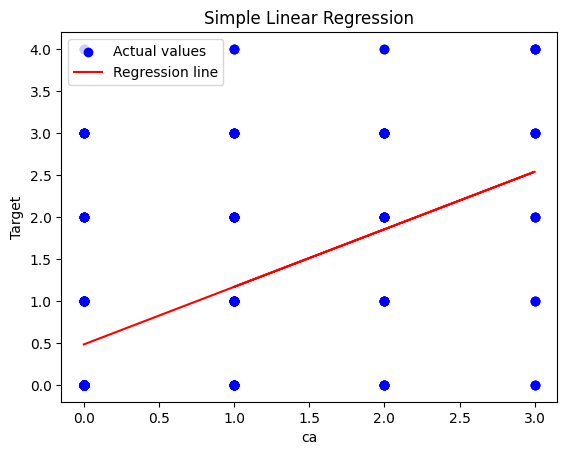

In [ ]:
def linear_regression(x, y):

    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    # Calculating the slope. (b1)
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = sum((xi - mean_x) ** 2 for xi in x)
    b1 = numerator / denominator

    # Calculating the intercept. (b0)
    b0 = mean_y - b1 * mean_x
    return b0, b1

# Calculating Regression Coefficients.
x = features[most_correlated_feature]
y = target

b0, b1 = linear_regression(x, y)
print(f"Intercept (b0): {b0}, Slope (b1): {b1}")


y_pred = [b0 + b1 * xi for xi in x]


plt.scatter(x, y, color='blue', label='Actual values')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel(most_correlated_feature)
plt.ylabel('Target')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()



# **Expected Output For Task 3:**


```
Intercept (b0): 0.48237601279868136, Slope (b1): 0.685245394023839
```
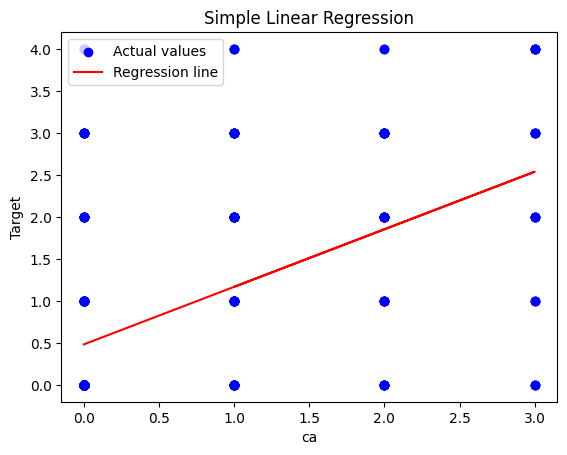



# **Task 4:**
Multiple Linear Regression

Regression Coefficients: [-0.11172436  0.40505831  0.17375783  0.25397083 -0.00658831  0.21507591]
Mean Squared Error (MSE) for Multiple Linear Regression: 0.698145094968024


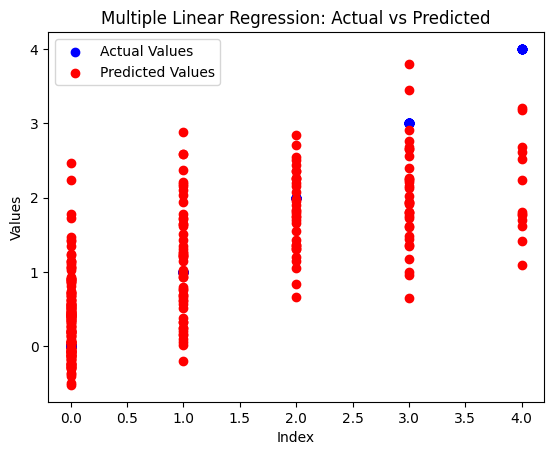

In [ ]:
def multiple_linear_regression(X, y):
    X_b = np.c_[np.ones(len(X)), X]
    X_transpose = X_b.T
    beta = np.linalg.inv(X_transpose.dot(X_b)).dot(X_transpose).dot(y)
    return beta

def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    return (1 / n) * sum((y_true - y_pred) ** 2)

# Selecting top 5 most correlated features:
sorted_correlations = {feature: abs(corr) for feature, corr in correlation_results.items()}
sorted_correlations = dict(sorted(sorted_correlations.items(), key=lambda item: item[1], reverse=True))
top_5_features = list(sorted_correlations.keys())[:5]

X = features[top_5_features]

# Calculating the regression coefficients
beta = multiple_linear_regression(X, target)
print("Regression Coefficients:", beta)

X_b = np.c_[np.ones(len(X)), X]
y_pred = X_b.dot(beta)

mse_multiple = mean_squared_error(target, y_pred)
print(f"Mean Squared Error (MSE) for Multiple Linear Regression: {mse_multiple}")

plt.scatter(y, target, color='blue', label='Actual Values')
plt.scatter(y, y_pred, color='red', label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

# **Expected Output for Task 4:**

```
Regression Coefficients: [-0.11172436  0.40505831  0.17375783  0.25397083 -0.00658831  0.21507591]

Mean Squared Error (MSE) for Multiple Linear Regression: 0.698145094968024
```
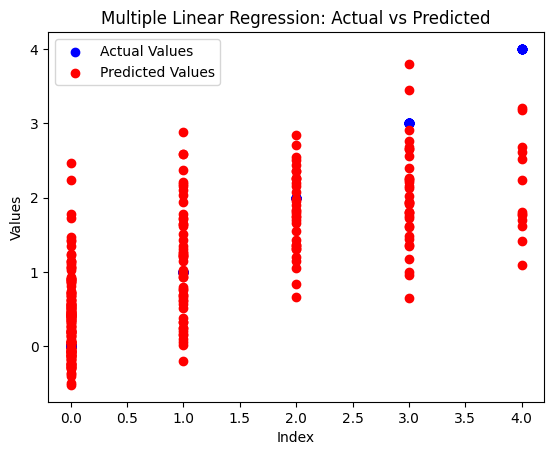

# **Task 5:**
Logistic Regression

Accuracy of Logistic Regression Model: 0.6333


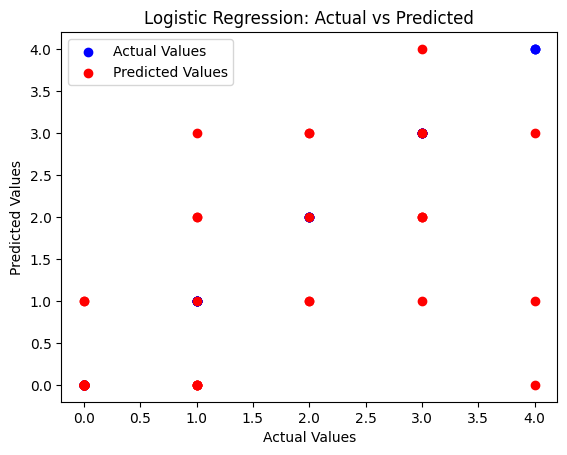

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

top_5_features = list(sorted_correlations.keys())[:5]

X = features[top_5_features]
y = target

# Spliting the dataset into training and testing sets. (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialized the logistic regression model.
logreg_model = LogisticRegression(max_iter=10000)

# Training the model using the training data.
logreg_model.fit(X_train, y_train)

# Using the test set to make predictions.
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy:.4f}")

plt.scatter(y_test, y_test, color='blue', label='Actual Values')
plt.scatter(y_test, y_pred, color='red', label='Predicted Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Logistic Regression: Actual vs Predicted')
plt.legend()
plt.show()

# **Expected Output for Task 5:**
Accuracy of Logistic Regression Model: 0.6333

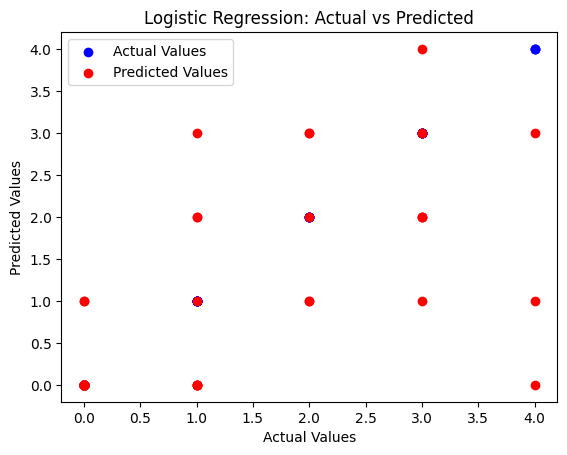

# **Task 6:**
Polynomial Regression

Mean Squared Error (MSE) for Polynomial Regression: 1.0981299805256217


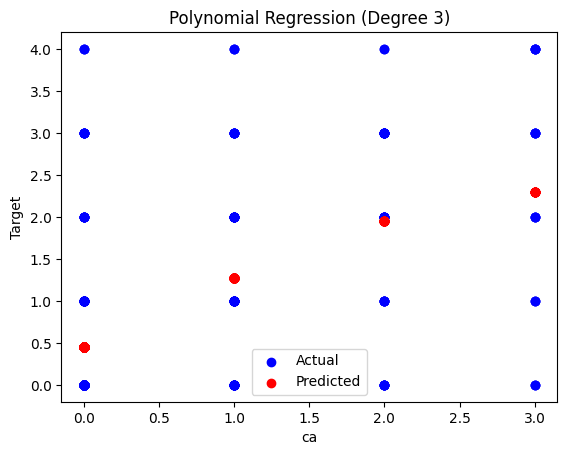

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    return (1 / n) * sum((y_true - y_pred) ** 2)


# Polynomial Regression
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(features[[most_correlated_feature]])
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, target)
y_pred_poly = poly_reg_model.predict(X_poly)
mse_poly = mean_squared_error(target, y_pred_poly)


print(f"Mean Squared Error (MSE) for Polynomial Regression: {mse_poly}")

plt.scatter(features[most_correlated_feature], target, color='blue', label='Actual')
plt.scatter(features[most_correlated_feature], y_pred_poly, color='red', label='Predicted')
plt.xlabel(most_correlated_feature)
plt.ylabel('Target')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.show()



# **Expected Output for Task 6:**


```
Mean Squared Error (MSE) for Polynomial Regression: 1.0981299805256217
```


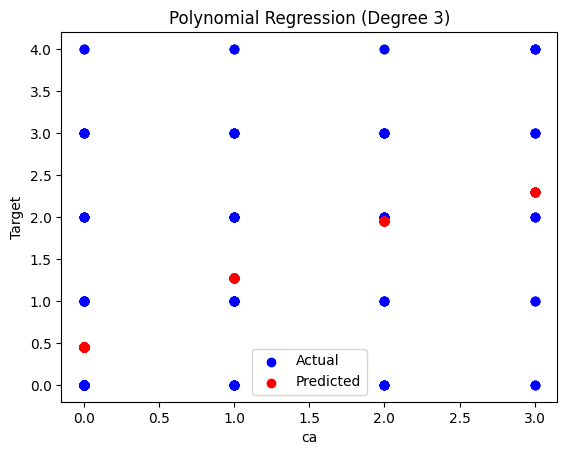

# **Conclusion**



```
Simple Linear Regression Performance Discussion:
The Simple Linear Regression model shows an MSE of 1.1063864983460379 . This model captures the relationship between the target and the most correlated single feature.
This model is suitable if only a single feature with high correlation is needed, but may lack accuracy when multiple influential features are present.

Multiple Linear Regression Performance Discussion:
The Multiple Linear Regression model has an MSE of 0.6981450949680241 . This model leverages multiple top correlated features, making it more accurate than single-feature models.
This model is generally suitable for capturing relationships when multiple features impact the target.

Logistic Regression Performance Discussion:
The Logistic Regression model achieved an accuracy of 0.6333333333333333 . Logistic regression is suitable for binary classification tasks, making it effective for predicting the presence of heart disease.
This model is a good fit for this dataset if the task is classification rather than regression.

Polynomial Regression Performance Discussion:
The Polynomial Regression model with degree 3 has an MSE of 1.0981299805256248 . Polynomial regression captures nonlinear relationships, which can be useful for complex data patterns.
However, higher degrees risk overfitting, so this model is suitable if nonlinear patterns are confirmed.

Model Performance Comparison:
                              Model       MSE  Accuracy
0          Simple Linear Regression  1.106386       N/A
1        Multiple Linear Regression  0.698145       N/A
2               Logistic Regression       N/A  0.633333
3  Polynomial Regression (Degree 3)   1.09813       N/A

Conclusion:
The best model depends on the task's objective. Logistic Regression offers high accuracy for classification, while Multiple Linear Regression provides reliable predictive accuracy by using multiple features.
```

